# [과제 2] 회귀분석
### - Ch 1, Ch 2를 토대로 자유롭게 회귀분석과 회귀진단을 진행해주세요.
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

# Data 

데이터 출처 : https://www.kaggle.com/avikasliwal/used-cars-price-prediction 

< y > 
* **Price** : The price of the used car in INR Lakhs.



< X > 
* Name : The brand and model of the car
* Location : The location in which the car is being sold or is available for purchase.
* Year : The year or edition of the model.
* Kilometers_Driven : The total kilometres driven in the car by the previous owner(s) in KM.
* Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
* Transmission : The type of transmission used by the car. (Automatic / Manual)
* Owner_Type : Whether the ownership is Firsthand, Second hand or other.
* Mileage : The standard mileage offered by the car company in kmpl or km/kg
* Engine : The displacement volume of the engine in CC.
* Power : The maximum power of the engine in bhp.
* Seats : The number of seats in the car.
* New_Price : The price of a new car of the same model.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###data 불러오기

In [4]:
# Load Data 
data = pd.read_csv("/content/drive/MyDrive/dataset/assignment2_data.csv")
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


###데이터 전처리

In [10]:
#결측치 및 이상치를 제거한다
#New_Price의 결측치가 너무 많아서 feature 자체를 제거함
print(data.isnull().sum())
data = data.drop('New_Price',axis=1)
data = data.dropna(how = 'any')

Unnamed: 0            0
Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5975 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         5975 non-null   int64  
 1   Name               5975 non-null   object 
 2   Location           5975 non-null   object 
 3   Year               5975 non-null   int64  
 4   Kilometers_Driven  5975 non-null   int64  
 5   Fuel_Type          5975 non-null   object 
 6   Transmission       5975 non-null   object 
 7   Owner_Type         5975 non-null   object 
 8   Mileage            5975 non-null   object 
 9   Engine             5975 non-null   object 
 10  Power              5975 non-null   object 
 11  Seats              5975 non-null   float64
 12  Price              5975 non-null   float64
dtypes: float64(2), int64(3), object(8)
memory usage: 653.5+ KB


In [14]:
data = data.drop('Unnamed: 0',axis=1)
data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


In [15]:
#범주형 변수를 처리하기 위해 해당 feature들을 one-hot encoding을 통해 변환해준다
print(data.Location.unique())
print(data.Fuel_Type.unique())
print(data.Transmission.unique())
print(data.Owner_Type.unique())

['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
['CNG' 'Diesel' 'Petrol' 'LPG']
['Manual' 'Automatic']
['First' 'Second' 'Fourth & Above' 'Third']


In [16]:
#get_dummy를 통해 one-hot encoding
location_dummy = pd.get_dummies(data.Location)
fuel_dummy = pd.get_dummies(data.Fuel_Type)
transmission_dummy = pd.get_dummies(data.Transmission)
owner_dummy = pd.get_dummies(data.Owner_Type)

location_dummy.columns=data.Location.unique()
fuel_dummy.columns=data.Fuel_Type.unique()
transmission_dummy.columns=data.Transmission.unique()
owner_dummy.columns=data.Owner_Type.unique()

In [17]:
data = data.drop(['Location', 'Fuel_Type', 'Transmission', 'Owner_Type'], axis=1)

data = pd.concat([data, location_dummy], axis=1)
data = pd.concat([data, fuel_dummy], axis=1)
data = pd.concat([data, transmission_dummy], axis=1)
data = pd.concat([data, owner_dummy], axis=1)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5975 entries, 0 to 6018
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Year               5975 non-null   int64  
 2   Kilometers_Driven  5975 non-null   int64  
 3   Mileage            5975 non-null   object 
 4   Engine             5975 non-null   object 
 5   Power              5975 non-null   object 
 6   Seats              5975 non-null   float64
 7   Price              5975 non-null   float64
 8   Mumbai             5975 non-null   uint8  
 9   Pune               5975 non-null   uint8  
 10  Chennai            5975 non-null   uint8  
 11  Coimbatore         5975 non-null   uint8  
 12  Hyderabad          5975 non-null   uint8  
 13  Jaipur             5975 non-null   uint8  
 14  Kochi              5975 non-null   uint8  
 15  Kolkata            5975 non-null   uint8  
 16  Delhi              5975 

In [20]:
#mileage 와 engine feature를 실수형으로 변환한다
data.Mileage = data.Mileage.str.split(" ").str[0].astype('float')
data.Engine = data.Engine.str.split(" ").str[0].astype('float')

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5975 entries, 0 to 6018
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Year               5975 non-null   int64  
 2   Kilometers_Driven  5975 non-null   int64  
 3   Mileage            5975 non-null   float64
 4   Engine             5975 non-null   float64
 5   Power              5975 non-null   object 
 6   Seats              5975 non-null   float64
 7   Price              5975 non-null   float64
 8   Mumbai             5975 non-null   uint8  
 9   Pune               5975 non-null   uint8  
 10  Chennai            5975 non-null   uint8  
 11  Coimbatore         5975 non-null   uint8  
 12  Hyderabad          5975 non-null   uint8  
 13  Jaipur             5975 non-null   uint8  
 14  Kochi              5975 non-null   uint8  
 15  Kolkata            5975 non-null   uint8  
 16  Delhi              5975 

In [25]:
#Power의 type이 여전히 object이므로 이상치가 있는지 확인해보겠다
data.Power.unique()

array(['58.16 bhp', '126.2 bhp', '88.7 bhp', '88.76 bhp', '140.8 bhp',
       '55.2 bhp', '63.1 bhp', '171.5 bhp', '103.6 bhp', '74 bhp',
       '103.25 bhp', '116.3 bhp', '187.7 bhp', '115 bhp', '175.56 bhp',
       '98.6 bhp', '83.8 bhp', '167.62 bhp', '190 bhp', '88.5 bhp',
       '177.01 bhp', '80 bhp', '67.1 bhp', '102 bhp', '108.45 bhp',
       '138.1 bhp', '184 bhp', '179.5 bhp', '103.5 bhp', '64 bhp',
       '82 bhp', '254.8 bhp', '73.9 bhp', '46.3 bhp', '37.5 bhp',
       '77 bhp', '82.9 bhp', '149.92 bhp', '138.03 bhp', '112.2 bhp',
       '163.7 bhp', '71 bhp', '105 bhp', '174.33 bhp', '75 bhp',
       '103.2 bhp', '53.3 bhp', '78.9 bhp', '147.6 bhp', '147.8 bhp',
       '68 bhp', '186 bhp', '170 bhp', '69 bhp', '140 bhp', '78 bhp',
       '194 bhp', '500 bhp', '108.5 bhp', '86.8 bhp', '187.74 bhp',
       'null bhp', '132 bhp', '86.7 bhp', '73.94 bhp', '117.3 bhp',
       '218 bhp', '168.5 bhp', '89.84 bhp', '110 bhp', '90 bhp',
       '82.85 bhp', '67 bhp', '241.4 bhp', '3

In [26]:
#null 이 들어가있는 것을 확인할 수 있다
#해당 항목들을 제거해준다
delete = data[data.Power.str.split(" ").str[0] == 'null'].index
data = data.drop(delete)

In [27]:
data.Power = data.Power.str.split(" ").str[0].astype('float')

In [31]:
data = data.drop(['Name'], axis = 1)
data.info()
#전처리가 완료된 것을 확인할 수 있다

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 6018
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               5872 non-null   int64  
 1   Kilometers_Driven  5872 non-null   int64  
 2   Mileage            5872 non-null   float64
 3   Engine             5872 non-null   float64
 4   Power              5872 non-null   float64
 5   Seats              5872 non-null   float64
 6   Price              5872 non-null   float64
 7   Mumbai             5872 non-null   uint8  
 8   Pune               5872 non-null   uint8  
 9   Chennai            5872 non-null   uint8  
 10  Coimbatore         5872 non-null   uint8  
 11  Hyderabad          5872 non-null   uint8  
 12  Jaipur             5872 non-null   uint8  
 13  Kochi              5872 non-null   uint8  
 14  Kolkata            5872 non-null   uint8  
 15  Delhi              5872 non-null   uint8  
 16  Bangalore          5872 

###회귀분석모델

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

In [32]:
#데이터셋을 train, test set으로 분류한다
X = data.drop(['Price'], axis=1)
y = data.Price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [33]:
#모델 선언 및 fitting
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

###결과 및 시각화

In [38]:
print(" 모델의 절편 :", model.intercept_)
print(" 모델의 계수 :", model.coef_)

 모델의 절편 : -2025.776391504325
 모델의 계수 : [ 1.00864184e+00  1.42302676e-06 -2.20743701e-01 -2.82983376e-04
  1.32646026e-01 -8.18643717e-01 -2.76493284e-01  9.29233068e-01
  1.39388653e-01  1.62692826e+00 -5.27093378e-01  1.35651528e+00
  2.97892981e-01 -4.24482036e-01 -1.40033754e+00 -1.59265008e+00
 -1.28901922e-01  1.29397243e+00 -1.30894706e-01  1.38407584e+00
 -2.54715356e+00  1.25800156e+00 -1.25800156e+00  2.91300380e-02
 -2.98526340e-01 -5.63105802e-01  8.32502104e-01]


In [40]:
pred = model.predict(X_train)
print("mse :" ,mean_squared_error(y_train, pred))

mse : 36.85384140973631


In [49]:
import matplotlib.pyplot as plt

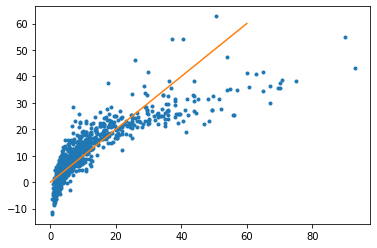

In [52]:
#약간 벗어나게 예측한 것을 알 수 있다
#상관계수가 높은 변수들을 삭제하는 등 처리를 거쳐 정확도를 더욱 향상시킬 수 있을 것 같다
plt.plot(y_test, model.predict(X_test), '.')
x = np.linspace(0, 60, 60)
y=x
plt.plot(x, y)